# Markov Random Fields

The 'Markov' in Markov Random Fields (*MRF*) comes from the assumption that pixels are uniquely described by its neighboring pixels. This is our prior assumption.
In addition, we have a likelihood term which we measure directly from data: the image intensities.

Using Bayes theorem we can find the posterior from the product of the likelihood and the prior. 
In this assignment we will find the Maximum a posteriori (*MAP*) segmentation (*f*) as our binary segmentation.

Instead of using probabilites, we will use *energies* which are easier as they sum.

The posterior energy is given as: $$ E(f | \mathcal{D}) = E(\mathcal{D} | f) + E(f)$$ and the goal is to minimize this.

The likelihood energy $$E(\mathcal{D} | f)$$ is a sum of *one-clique* potentials - potentials for singel pixels. The likelihood energy is defined as: 
$$ E(\mathcal{D} | f) = \sum_{i} V_1(f_i) = \sum_{i} (\mu(f_i) - d_i)^2 $$, where $f_i$ is the label assigned to pixel $i$, $d_i$ is the intensity of pixel $i$ and $\mu(f_i)$ is the mean intensity of class $f_i$.

The prior energy $E(f)$ is a sum of *two-clique* potentials - the potentials of pairs of pixels. 
Our prior assumptions is that neighbouring pixels are from the same class. Therefore, the two-clique potential is defiend for neighbouring pixels (in the *x* and *y* direction):

 $$V_2(f_i, f_{i'}) = \beta$$ if $f_i \neq f_{i'} $ else $V_2(f_i, f_{i'}) = 0$

In other words, the configuration/segmentation $f$ recieves a penalty $\beta$ for every neighbour pairs of pixels which are not in the same class, otherwise 0.

In [ ]:
!pip install scikit-image numpy matplotlib opencv-python scipy


You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


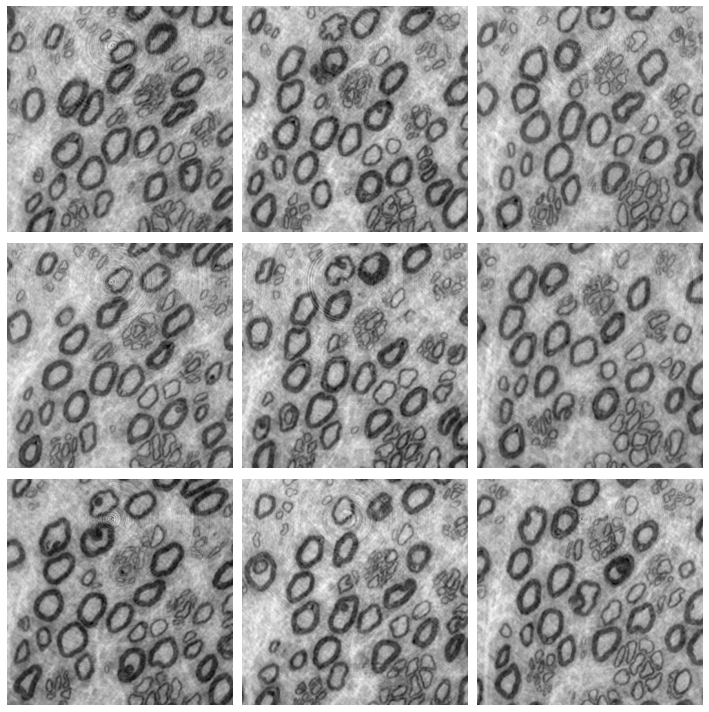

In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

plt.style.use("seaborn")

data_path = 'data/nerves_part.tiff'
data      = io.imread(data_path, plugin='pil') / 255.0

fig, ax = plt.subplots(3,3, figsize = (10,10))
for i in range(9):
    ax[i % 3, i // 3].imshow(data[i*100], cmap = 'gray')
    ax[i % 3, i // 3].axis('off')
fig.tight_layout()


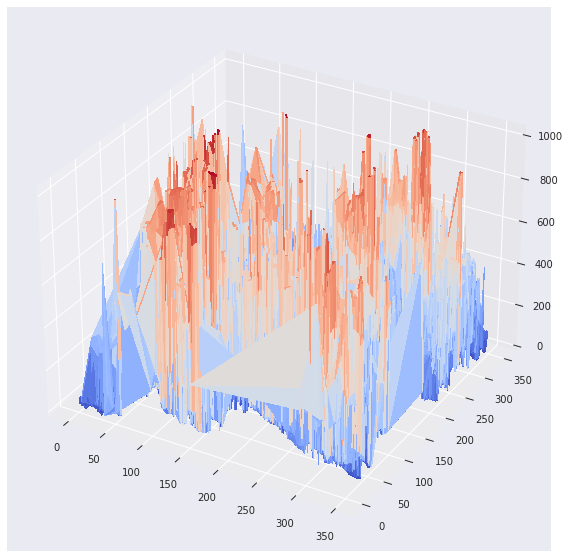

In [16]:
# !pip install plotly
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# import plotly.graph_objects as go

D = data < 0.2
Z, X, Y = np.where(D)
Z.shape, X.shape, Y.shape

fig, ax = plt.subplots(figsize = (10,10), subplot_kw={"projection": "3d"})
surf = ax.plot_trisurf(X, Y, Z.reshape(-1), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)



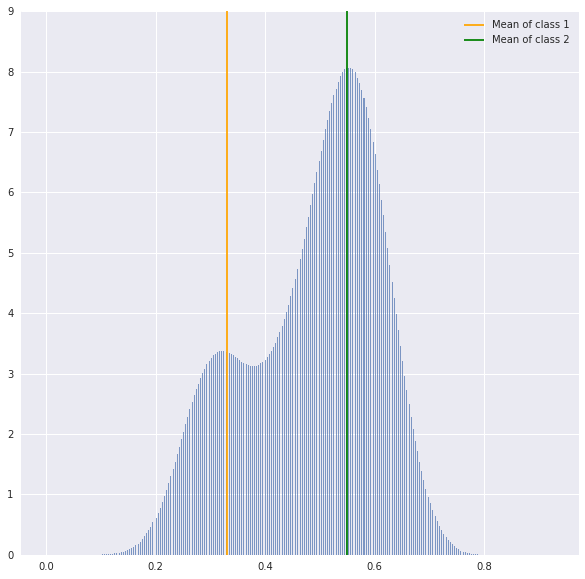

In [ ]:
# Intensity histogram


fig, ax = plt.subplots(1,1, figsize = (10,10))

ax.hist(data.ravel(), bins = 500, alpha = 0.7, density = True);
ax.vlines(x = 0.33, ymin = 0, ymax = 9, colors = 'orange', label = 'Mean of class 1')
ax.vlines(x = 0.55, ymin = 0, ymax = 9, colors = 'green', label = 'Mean of class 2')
ax.set_ylim(0, 9)
ax.legend();

In [ ]:
# !python -m pip install git+https://github.com/pmneila/PyMaxflow.git
import maxflow
# !pip freeze
# maxflow.Graph()
maxflow.fastmin
# import PyMaxflow

AttributeError: module 'maxflow' has no attribute 'fastmin'

## Graph Cuts

The interactions modelled by MRF prior make optimization (finding an optimal configuration) of the MRF very difficult. 

For the binary segmentation task, however, with only one-clique and 2-clique potential (as in our case), the optimal configuration can be found as finding a minimum $s-t$ cut of a graph constructed from the energyfunction

In [ ]:
import numpy as np
import maxflow



In [ ]:
d = data[0]
mu = [0, 255] 
beta = 1000

w_s = (d-mu[0])**2
w_t = (d-mu[1])**2
N = np.prod(d.shape)

# create graph
g = maxflow.Graph[int]()

# Add (non-terminal) nodes and retrieve an index for each node
nodes = g.add_nodes(N)
# Create edges between nodes
for i in range(N-1):
    g.add_edge(nodes[i], nodes[i+1], beta, beta)
# Set the capacities of the terminal edges.
for i in range(N):
    g.add_tedge(nodes[i], (d[i]-mu[1])**2, (d[i]-mu[0])**2)
# Run the max flow algorithm
flow = g.maxflow()
print(f'Maximum flow: {flow}')

# displaying the results
labeling = [g.get_segment(nodes[i]) for i in range(N)]
gend = 'MF'


# fig, ax = plt.subplots()
# ax.imshow(d)

122500

In [ ]:
d = np.array([179, 174, 182, 162, 175, 165]) # heights (data)
mu = [181, 165] # means of two classes
beta = 1000 # weight of the prior term
w_s = (d-mu[0])**2 # source weight
w_t = (d-mu[1])**2 # sink weights
N = len(d) # number of graph nodes

# Create a graph with integer capacities.
g = maxflow.Graph[int]()
# Add (non-terminal) nodes and retrieve an index for each node
nodes = g.add_nodes(N)
# Create edges between nodes
for i in range(N-1):
    g.add_edge(nodes[i], nodes[i+1], beta, beta)
# Set the capacities of the terminal edges.
for i in range(N):
    g.add_tedge(nodes[i], (d[i]-mu[1])**2, (d[i]-mu[0])**2)
# Run the max flow algorithm
flow = g.maxflow()
print(f'Maximum flow: {flow}')

# displaying the results
labeling = [g.get_segment(nodes[i]) for i in range(N)]
gend = 'MF'

for i in range(0,N):
    print(f'Person {i} is estimated as {gend[labeling[i]]}') 

Text(0.5, 1.0, 'max likelihood')

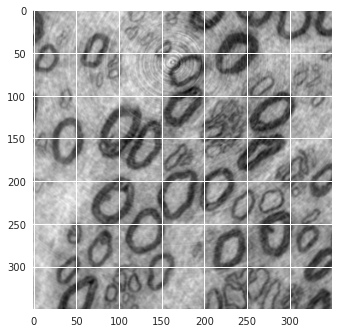

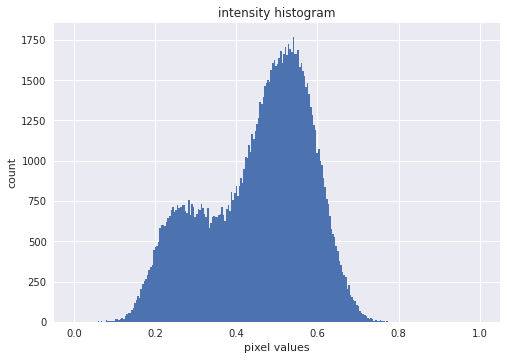

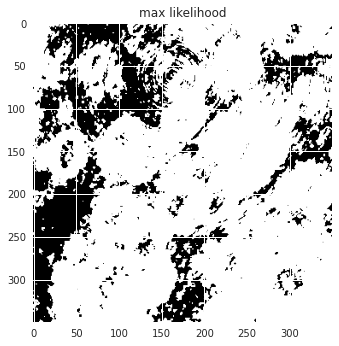

In [ ]:
plt.style.use("seaborn")

def segmentation_histogram(ax, I, S, edges=None):
    '''
    Histogram for data and each segmentation label.
    '''
    if edges is None:
        edges = np.linspace(I.min(), I.max(), 100)
    ax.hist(I.ravel(), bins=edges, color = 'k')
    centers = 0.5*(edges[:-1] + edges[1:]);
    for k in range(S.max()+1):
        ax.plot(centers, np.histogram(I[S==k].ravel(), edges)[0])



I = data[0]

fig, ax = plt.subplots()
ax.imshow(I, cmap=plt.cm.gray)

edges = np.linspace(0, 1, 257)
fig, ax = plt.subplots()
ax.hist(I.ravel(), edges)
ax.set_xlabel('pixel values')
ax.set_ylabel('count')
ax.set_title('intensity histogram')

#%% Define likelihood
mu = np.array([0.40, 0.71])
U = np.stack([(I-mu[i])**2 for i in range(len(mu))],axis=2)
S0 = np.argmin(U,axis=2)

fig, ax = plt.subplots()
ax.imshow(S0)
ax.set_title('max likelihood')

# Define prior, construct graph, solve
# beta  = 0.1
# g = maxflow.Graph[float]()
# nodeids = g.add_grid_nodes(I.shape)
# g.add_grid_edges(nodeids, beta)
# g.add_grid_tedges(nodeids, U[:,:,1], U[:,:,0])

# #  solving
# g.maxflow()
# S = g.get_grid_segments(nodeids)

# fig, ax = plt.subplots()
# ax.imshow(S)
# ax.set_title('max posterior')

# fig, ax = plt.subplots()
# segmentation_histogram(ax, I, S, edges=edges)
# ax.set_aspect(1./ax.get_data_ratio())
# ax.set_xlabel('pixel values')
# ax.set_ylabel('count')
# ax.set_title('segmentation histogram')

In [ ]:
!sudo apt update
!sudo apt install snapd
!sudo snap install pyflow --classic


Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://deb.debian.org/debian buster-updates InRelease
Hit:3 http://security.debian.org/debian-security buster/updates InRelease



32 packages can be upgraded. Run 'apt list --upgradable' to see them.



The following additional packages will be installed:
  apparmor dbus dmsetup libapparmor1 libargon2-1 libcap2 libcryptsetup12
  libdevmapper1.02.1 libidn11 libip4tc0 libjson-c3 libkmod2 libnss-systemd
  libpam-systemd squashfs-tools systemd systemd-sysv udev
Suggested packages:
  apparmor-profiles-extra apparmor-utils default-dbus-session-bus
  | dbus-session-bus zenity | kdialog systemd-container policykit-1
The following NEW packages will be installed:
  apparmor dbus dmsetup libapparmor1 libargon2-1 libcap2 libcryptsetup12
  libdevmapper1.02.1 libidn11 libip4tc0 libjson-c3 libkmod2 libnss-systemd
  libpam-systemd snapd squashfs-tools systemd systemd-sysv udev
0 upgraded, 19 newly installed, 0 to remove and 32 not upgraded.
Ne

In [ ]:
!pip install PyMaxflow

     |████████████████████████████████| 123 kB 32.5 MB/s 
  Created wheel for PyMaxflow: filename=PyMaxflow-1.2.13-cp37-cp37m-linux_x86_64.whl size=110065 sha256=b133b6d3821f5291791f43419735d7f3c816c714e7f31f63691dc74171e8ccfc
  Stored in directory: /root/.cache/pip/wheels/62/f9/eb/62e4c1fcbee43e64b749674879fd3248d8c49f08c37c8a564d
Successfully built PyMaxflow
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import maxflow
import 
maxflow.Graph

AttributeError: module 'maxflow' has no attribute 'Graph'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d8e4ab9c-1c0a-457e-84a9-315a391bff2f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>